In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("roc_scores_rf.csv")

In [3]:
y_true = df["y_true"]

candidate_cols = ["rf", "xgb", "tab", "mlp"]
model_cols = [c for c in candidate_cols if c in df.columns]

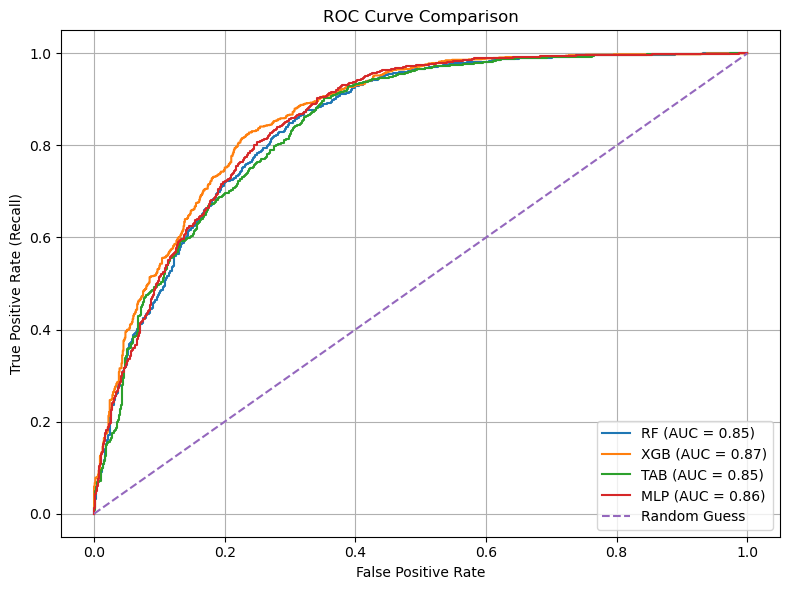

In [4]:
plt.figure(figsize=(8, 6))

for col in model_cols:
    y_score = df[col].values
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
 
    plt.plot(fpr, tpr, label=f"{col.upper()} (AUC = {auc:.2f})")


plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
print(y_true)

0       1
1       0
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    0
1998    1
1999    1
Name: y_true, Length: 2000, dtype: int64
